In [68]:
# Suppose we have some data from a known function. Note the index points in
# general have shape `[b1, ..., bB, f1, ..., fF]` (here we assume `F == 1`),
# so we need to explicitly consume the feature dimensions (just the last one
# here).
f = lambda x: np.sin(10*x[..., 0]) * np.exp(-x[..., 0]**2)
observation_index_points = np.linspace(-1,1,2)[:,None]
observations = f(observation_index_points) + np.random.normal(0., .05, 2)

kernel = psd_kernels.ExponentiatedQuadratic(np.float64(1.0), np.float64(1.0))
# We can construct the posterior at a new set of `index_points` using the same
# kernel (with the same parameters, which we'll optimize below).
index_points = np.linspace(-1., 1., 100)[:, None]
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel,
    index_points=index_points,
    observation_index_points=observation_index_points,
    observations=observations,
    observation_noise_variance=np.float64(0.001))

samples = gprm.sample(100)
# ==> 10 independently drawn, joint samples at `index_points`.

In [69]:
gprm.log_prob(np.linspace(0,1,100))

<tf.Tensor: id=84071, shape=(), dtype=float64, numpy=-385.01929252792036>

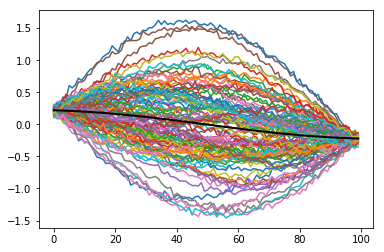

In [70]:
plt.plot(samples.numpy().T);
plt.plot(gprm.mean(),'k-',lw=2)

In [55]:
# Suppose we have some data from a known function. Note the index points in
# general have shape `[b1, ..., bB, f1, ..., fF]` (here we assume `F == 1`),
# so we need to explicitly consume the feature dimensions (just the last one
# here).
f = lambda x: np.sin(10*x[..., 0]) * np.exp(-x[..., 0]**2)
observation_index_points = np.linspace(-1,1,2)[:,None]
observations = f(observation_index_points) + np.random.normal(0., .05, 2)

kernel = psd_kernels.ExponentiatedQuadratic(np.float64(1.0), np.float64(1.0))
# We can construct the posterior at a new set of `index_points` using the same
# kernel (with the same parameters, which we'll optimize below).
index_points = np.linspace(-1., 1., 100)[:, None]
gprm = tfd.GaussianProcessRegressionModel(
    kernel=kernel,
    index_points=np.linspace(-1,1,100)[:,None],
    observation_index_points=np.linspace(-1,1,4)[:,None],
    observations=np.random.randn(10,4),
    observation_noise_variance=np.float64(0.001))

##samples = gprm.sample(10)
# ==> 10 independently drawn, joint samples at `index_points`.
gprm.mean()


<tf.Tensor: id=75698, shape=(10, 100), dtype=float64, numpy=
array([[ 1.12099345e+00,  1.12144166e+00,  1.12115131e+00,
         1.12011118e+00,  1.11831098e+00,  1.11574133e+00,
         1.11239385e+00,  1.10826117e+00,  1.10333694e+00,
         1.09761588e+00,  1.09109379e+00,  1.08376758e+00,
         1.07563530e+00,  1.06669615e+00,  1.05695047e+00,
         1.04639983e+00,  1.03504694e+00,  1.02289574e+00,
         1.00995138e+00,  9.96220210e-01,  9.81709793e-01,
         9.66428911e-01,  9.50387549e-01,  9.33596897e-01,
         9.16069333e-01,  8.97818416e-01,  8.78858869e-01,
         8.59206563e-01,  8.38878492e-01,  8.17892758e-01,
         7.96268537e-01,  7.74026055e-01,  7.51186559e-01,
         7.27772280e-01,  7.03806397e-01,  6.79313005e-01,
         6.54317067e-01,  6.28844378e-01,  6.02921517e-01,
         5.76575803e-01,  5.49835246e-01,  5.22728497e-01,
         4.95284795e-01,  4.67533920e-01,  4.39506131e-01,
         4.11232120e-01,  3.82742945e-01,  3.54069983e

In [149]:
scaling_index_points = np.linspace(0,3,4)[:,None].astype(np.float64)
index_points = np.linspace(0,3,160)[:,None].astype(np.float64)
scalingvalues = np.random.randn(64,160).astype(np.float64)
observations = np.random.normal(f(observation_index_points), .005).astype(np.float64)
observations = np.c_[observations,np.zeros(len(observations))]
observations[::2,0]=observations[::2,0]*3
observations[::2,1]=1


#(160, 1)
#(64, 160)
#(160, 2)

In [215]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
%matplotlib inline

tfd = tfp.distributions
psd_kernels = tfp.positive_semidefinite_kernels

N = 160
Nscaling = 4
Noutputs = 2
f = lambda x: 3*np.sin(3*x[..., 0]) * np.exp(-0.04*x[..., 0]**2)
observation_index_points = np.sort(np.random.uniform(-1., 1., N))[..., np.newaxis].astype(np.float64)
observations = np.random.normal(f(observation_index_points), .005).astype(np.float64)
observations = np.c_[observations,np.zeros(len(observations))]
#observations[::2,0]=observations[::2,0]*3
#observations[::2,1]=1
observations[-60:,0]+=7*(observation_index_points[-60:,0]-observation_index_points[-60,0])
oldobs = observations.copy()
observations[-100:,0]=oldobs[-100:,0]*3
observations[-100:,1]=1
observations[::3,0]=oldobs[::3,0]*3
observations[::3,1]=1

def joint_log_prob(index_points, scalingvalues, observations): 
    logprob = 0
    scaledobs = np.zeros([parallel,observations.shape[0]])
    for output in range(1,2):
        sel = np.where(observations[:,1]==output)[0]
        
        
        ####
        kernel = psd_kernels.ExponentiatedQuadratic(np.float64(1.0), np.float64(1.0))
        
        #print(index_points.shape)
        #print(np.linspace(-1., 1., 4)[:, None].shape)
        #print(scalingvalues[:,:,output].shape)
        
        gprm = tfd.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points[sel],
            observation_index_points=np.linspace(-1., 1., 4)[:, None],
            observations=scalingvalues[:,:,output-1],
            observation_noise_variance=np.float64(0.001))
        scaledobs[:,sel] = observations[sel,0]/np.exp(gprm.mean())
        
        k = psd_kernels.ExponentiatedQuadratic(np.float64(10.0),np.float64(1.0))
        gp_scalingvalues = tfd.GaussianProcess(
            kernel=k,
            index_points=np.linspace(-1., 1., 4)[:, None], 
            observation_noise_variance=np.float64(1e-2))
        logprob += gp_scalingvalues.log_prob(scalingvalues[:,:,output-1])
    
    sel = np.where(observations[:,1]==0)[0]
    scaledobs[:,sel] = observations[sel,0]
    
    gp = tfd.GaussianProcess(kernel=psd_kernels.ExponentiatedQuadratic(np.float64(10.0),np.float64(1.0)),index_points=index_points, observation_noise_variance=np.float64(1e-2))
    logprob+= gp.log_prob(scaledobs)    
    return logprob, scaledobs

parallel = 64
init_scaling = 1*np.random.randn(parallel,Nscaling,Noutputs-1).astype(np.float64)
#init_scaling[:,observations[:,1]==0]=0
initial_chain_states = [
    init_scaling,
]
def unnormalized_log_posterior(scalingvalues):
    logprob, scaledobs = joint_log_prob(observation_index_points, scalingvalues, observations)
    return logprob

unnormalized_log_posterior(tf.constant(init_scaling))

<tf.Tensor: id=33062594, shape=(64,), dtype=float64, numpy=
array([-7.97210804e+04, -1.98707330e+04, -8.56274836e+04, -2.61801881e+05,
       -3.22209744e+05, -7.20234833e+04, -2.39363342e+03, -5.27898542e+03,
       -3.09312391e+05, -1.39246389e+04, -3.24655305e+03, -1.21612282e+05,
       -3.06533603e+03, -7.44372912e+04, -8.46852592e+04, -1.69871259e+03,
       -5.27190093e+03, -7.32578185e+03, -2.17200728e+05, -6.05516198e+04,
       -5.29703400e+04, -3.58302000e+05, -4.79095933e+03, -1.65495171e+05,
       -2.77655982e+05, -6.42003302e+03, -3.81684061e+04, -6.58559095e+04,
       -4.15550297e+04, -8.82517275e+05, -5.71463155e+04, -3.37167339e+06,
       -6.47199932e+03, -1.44410221e+05, -4.58227643e+04, -8.82870190e+04,
       -1.42873225e+05, -3.46869686e+04, -4.08710774e+06, -1.72359981e+05,
       -6.23320404e+04, -1.34179142e+04, -5.44637085e+04, -4.98877503e+05,
       -4.90856679e+04, -1.68052770e+06, -4.76450218e+04, -3.31703421e+05,
       -2.00972309e+06, -8.46799340e+04,

In [216]:
num_results = 100
num_burnin_steps = 100
kernel = tfp.mcmc.HamiltonianMonteCarlo(
            target_log_prob_fn=unnormalized_log_posterior,
            step_size=np.float64(0.02),
            num_leapfrog_steps=2)
kernel = tfp.mcmc.SimpleStepSizeAdaptation(inner_kernel=kernel, num_adaptation_steps=int(num_burnin_steps * 0.8), target_accept_prob=np.float64(0.75))

from time import time
start = time()
[preds], kernel_results = tfp.mcmc.sample_chain(num_steps_between_results=5,
    num_results=num_results,
    num_burnin_steps=num_burnin_steps,
    current_state=initial_chain_states,
    kernel=kernel)
print("Time: %0.2f" % (time()-start))
print("Acceptance rate: {}".format(
  np.mean(kernel_results.inner_results.is_accepted)))

/home/mike/anaconda3/lib/python3.6/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Time: 116.46
Acceptance rate: 0.485


In [222]:
preds.shape

TensorShape([100, 64, 4, 1])

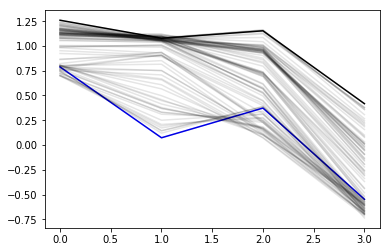

In [223]:
#plt.figure(figsize=[20,20])
plt.plot(preds.numpy()[0,0,:,0].T,'b-',markersize=1,alpha=1);
plt.plot(preds.numpy()[:,0,:,0].T,'k-',markersize=1,alpha=0.1);
plt.plot(preds.numpy()[-1,0,:,0].T,'k-',markersize=1,alpha=1);

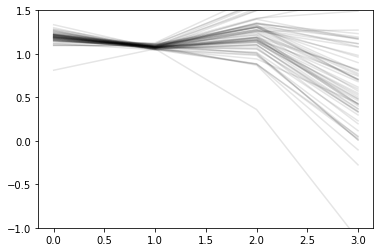

In [224]:
plt.ylim([-1,1.5])
plt.plot(preds.numpy()[-1,:,:,0].T,'k-',markersize=1,alpha=0.1);

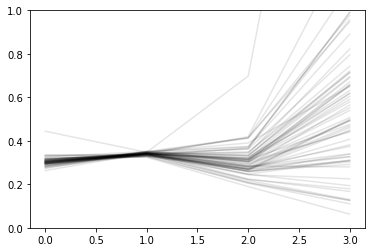

In [230]:
plt.ylim([0,1])
plt.plot(1/np.exp(preds.numpy()[-1,:,:,0].T),'k-',markersize=1,alpha=0.1);

In [225]:
logprob, scaledobs = joint_log_prob(observation_index_points, preds[-1,:,:,:], observations)

(-3, 10)

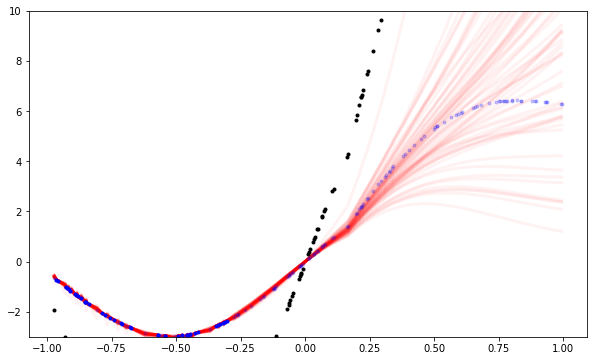

In [226]:
plt.figure(figsize=[10,6])
plt.plot(observation_index_points, scaledobs.T,'-r',lw=3,alpha=0.05);
plt.plot(observation_index_points[observations[:,1]==0], observations[observations[:,1]==0,0],'.b')
plt.plot(observation_index_points[observations[:,1]==1], observations[observations[:,1]==1,0]/3,'.b',alpha=0.2)
plt.plot(observation_index_points[observations[:,1]==1], observations[observations[:,1]==1,0],'.k')
plt.ylim([-3,10])

ValueError: x and y must have same first dimension, but have shapes (160, 1) and (1, 4, 64)

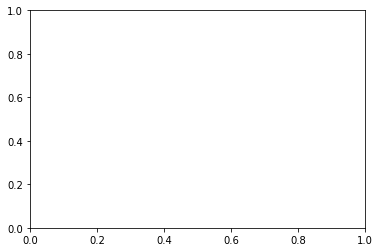

In [213]:
plt.plot(observation_index_points,donepreds[-1,:,:].T,'k.',alpha=0.1);

(0, 5)

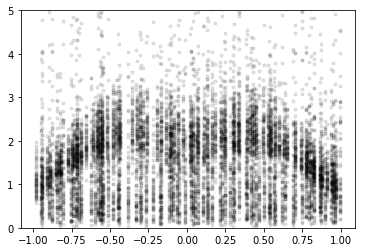

In [90]:
plt.plot(observation_index_points,np.exp(donepreds[-1,:,:].T),'k.',alpha=0.1);
plt.ylim([0,5])

(-10, 10)

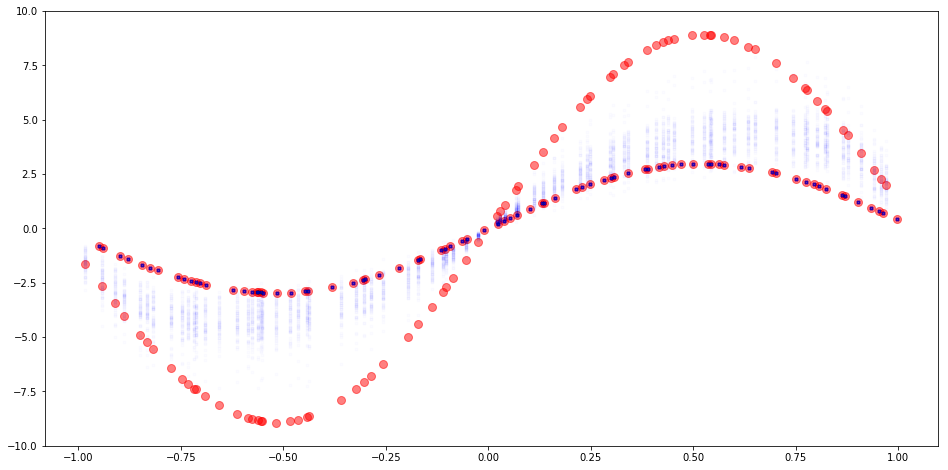

In [91]:
plt.figure(figsize=[16,8])
plt.plot(observation_index_points,observations[:,0],'r.',alpha=0.5,markersize=16)
donepreds[:,:,observations[:,1]==0]=0.0
#plt.plot(observations[:,0]/np.exp(donepreds[-1,0,:]),'b-')
##plt.plot(observation_index_points,np.mean(observations[:,0]/np.exp(donepreds[-1,:,:]),axis=0),'k-',lw=1,alpha=0.5)
plt.plot(observation_index_points,observations[:,0:1]/np.exp(donepreds[-1,:,:]).T,'b.',alpha=0.01)
plt.ylim([-10,10])
#plt.plot(observations[:,0]/np.exp(preds[0,0,:]),'k-')

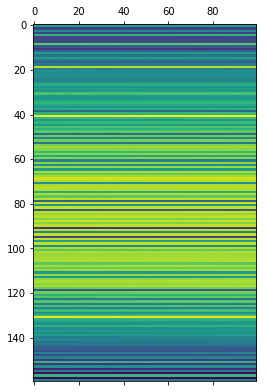

In [81]:
plt.matshow(preds.numpy()[::10,0,:].T)